# My Exploratory Data Analysis Process
## Running my EDA process on a Quandl data source
I will apply my EDA process on the Yale Dept of Economics S&P 500 data (YALE/SPCOMP)

## This is my process:

### Step 1. Describe data source - where did data come from? How was it created? Describe the source. Identify weak points in how the data was obtained

### Step 2: Describe Data Columns:
a.  What are all the data columns in this data set?  
b.  How many records?  
c.  What are the column data types?  
d.  What's the data range (What is the max value? What is the min value? Whats the mean value?)

### Step 3: Cleanup data (as needed)
a. Convert data values to useable formats (e.g. dates may be given as strings, convert to date type).  
b. Convert column names to more useful names

### Step 4: Univariate Plots
a. For each column, do a univariate type data plot: histogram, bar chart, etc.  
b. Display 10 highest and lowest value rows

### Step 5: Multivariate Plots & Analysis  
a. Plot 2 columns against each other using scatter plots, bar chart, etc.  
b. Perform multivariate analysis such as ANOVA, covariance, and correlation coefficients.
c. Normalizing data columns

### HINT: Don't get stuck on the details. Note interesting things and move on to next topic.

# Here we go!!!

### Step 1. Describe data source:
 1. This is the Yale Department of Economics S&P 500 data set.
 2. Data set was obtained from an API call to Quandl's website: https://www.quandl.com/data/YALE/SPCOMP-S-P-Composite
 3. Quandl's description of the data set:   
 *Publishes data related to the stock and housing markets; price data for common indexes, interest rates, earnings, dividends, house prices, and CPI.*  
 *This data set consists of monthly stock price, dividends, and earnings data and the consumer price index (to allow conversion to real values), all starting January 1871. Further info at http://www.econ.yale.edu/~shiller/data.htm.*

In [13]:
#We'll use R for this analysis
#load in Quandl library and write YALE data set to Qdata variable:
library(Quandl)
Quandl.api_key("sploooof")
Qdata <- Quandl("YALE/SPCOMP")

### Step 2: Describe Data Columns:
 a.  What are all the data columns in this data set?  
 b.  How many records?  
 c.  What are the column data types?

In [14]:
dplyr::glimpse(Qdata)

Observations: 1,766
Variables: 10
$ Year                           <date> 2018-02-28, 2018-01-31, 2017-12-31,...
$ `S&P Composite`                <dbl> 2762.13, 2789.80, 2664.34, 2593.61, ...
$ Dividend                       <dbl> NA, NA, 48.93000, 48.67667, 48.42333...
$ Earnings                       <dbl> NA, NA, NA, NA, NA, 107.08000, 106.0...
$ CPI                            <dbl> 246.4152, 246.4515, 246.5240, 246.66...
$ `Long Interest Rate`           <dbl> 2.78, 2.58, 2.40, 2.35, 2.36, 2.20, ...
$ `Real Price`                   <dbl> 2762.130, 2789.390, 2663.165, 2590.9...
$ `Real Dividend`                <dbl> NA, NA, 48.90842, 48.62659, 48.37470...
$ `Real Earnings`                <dbl> NA, NA, NA, NA, NA, 106.90484, 106.4...
$ `Cyclically Adjusted PE Ratio` <dbl> 33.40820, 33.76469, 32.25322, 31.378...


 d.  What's the data range (What is the max value? What is the min value? Whats the mean value?)

In [15]:
summary(Qdata)

      Year            S&P Composite         Dividend          Earnings       
 Min.   :1871-01-31   Min.   :   2.730   Min.   : 0.1800   Min.   :  0.1600  
 1st Qu.:1907-11-07   1st Qu.:   7.732   1st Qu.: 0.4100   1st Qu.:  0.5433  
 Median :1944-08-15   Median :  16.220   Median : 0.8233   Median :  1.3130  
 Mean   :1944-08-15   Mean   : 255.673   Mean   : 5.5616   Mean   : 12.6462  
 3rd Qu.:1981-05-23   3rd Qu.: 119.800   3rd Qu.: 6.2892   3rd Qu.: 13.5267  
 Max.   :2018-02-28   Max.   :2789.800   Max.   :48.9300   Max.   :107.0800  
                                         NA's   :2         NA's   :5         
      CPI         Long Interest Rate   Real Price     Real Dividend   
 Min.   :  6.28   Min.   : 1.500     Min.   :  66.7   Min.   : 4.915  
 1st Qu.: 10.10   1st Qu.: 3.291     1st Qu.: 167.6   1st Qu.: 8.402  
 Median : 18.15   Median : 3.860     Median : 249.3   Median :12.543  
 Mean   : 57.51   Mean   : 4.571     Mean   : 499.0   Mean   :14.894  
 3rd Qu.: 89.62   3rd

### Observations:
 - I see lots of N/As I'll need to handle
 - I see "Real" data versus "just" data
 - I see large difference between S&P composite's min and max values.
 - I see that data is time-series and spans time between 1/31/1871 and 2/28/2018.
   #### How can we have data for 2/28/2018? It's only 2/13/2018.

### Step 3: Cleanup data

In [33]:
#tidy the data:
tidy.Qdata <- make.names(names(Qdata), unique=TRUE)
Qdata_nodate<-Qdata[sapply(Qdata, is.numeric)]  #distribution ansys doesn't need dates. only include numeric data in dataframe
#some functions don't like spaces in variable names. rename these variables:
SP_Composite <- Qdata$'S&P Composite'
Long_Interest_Rate <- Qdata$'Long Interest Rate'
Real_Price <- Qdata$'Real Price'
Real_Dividend <- Qdata$'Real Dividend'
Real_Earnings <- Qdata$'Real Earnings'
Cyclically_Adjusted_PE_Ratio <- Qdata$'Cyclically Adjusted PE Ratio'

### Step 4: Univariate Plots
a. For each column, do a univariate type data plot: histogram, bar chart, etc.  
b. Display 10 highest and lowest value rows


Attaching package: 'tidyr'

The following object is masked from 'package:reshape2':

    smiths

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


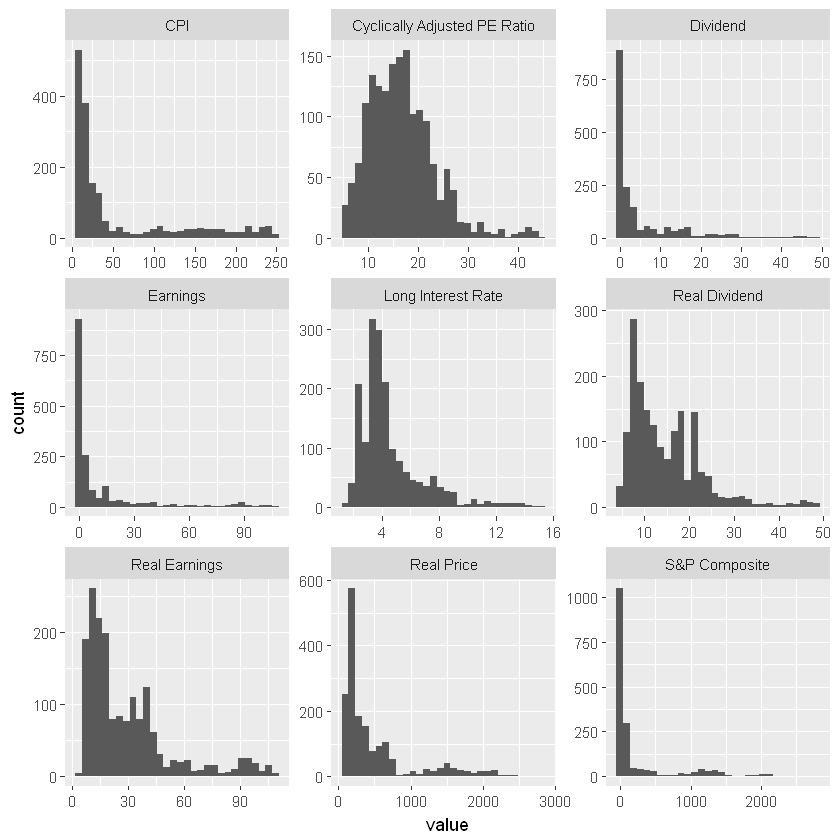

In [32]:
library(purrr)
library(tidyr)
library(ggplot2)
Qdata %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram(na.rm = TRUE)

### Step 5: Multivariate Plots & Analysis 
a. Do pairwise plots

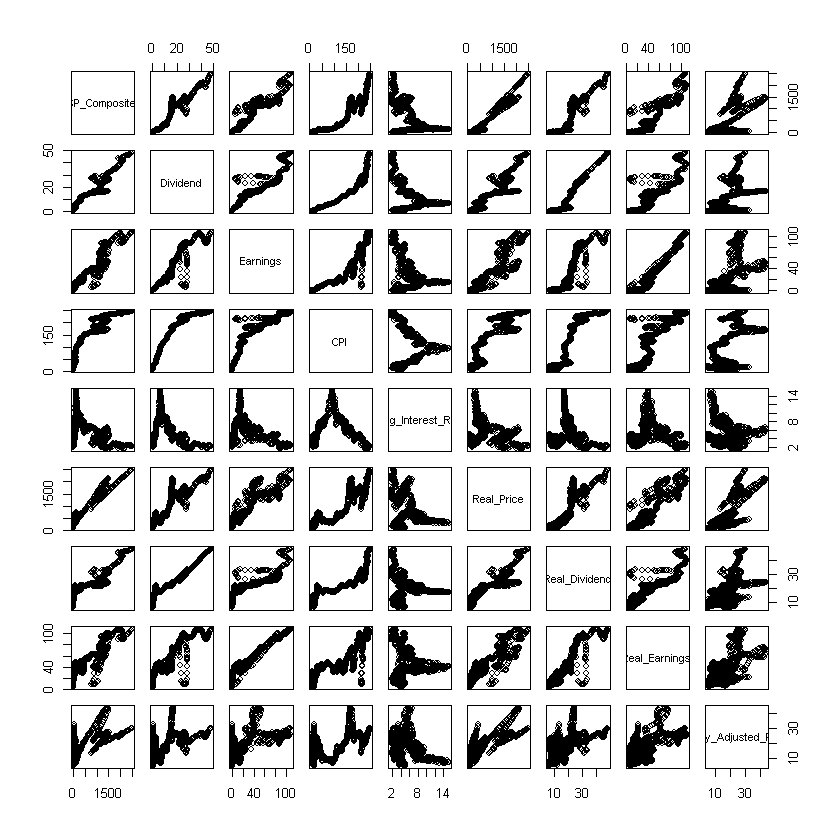

In [34]:
pairs(~SP_Composite+Dividend+Earnings+CPI+Long_Interest_Rate+Real_Price+Real_Dividend+Real_Earnings+Cyclically_Adjusted_PE_Ratio,data=Qdata_nodate, na.action = na.omit)

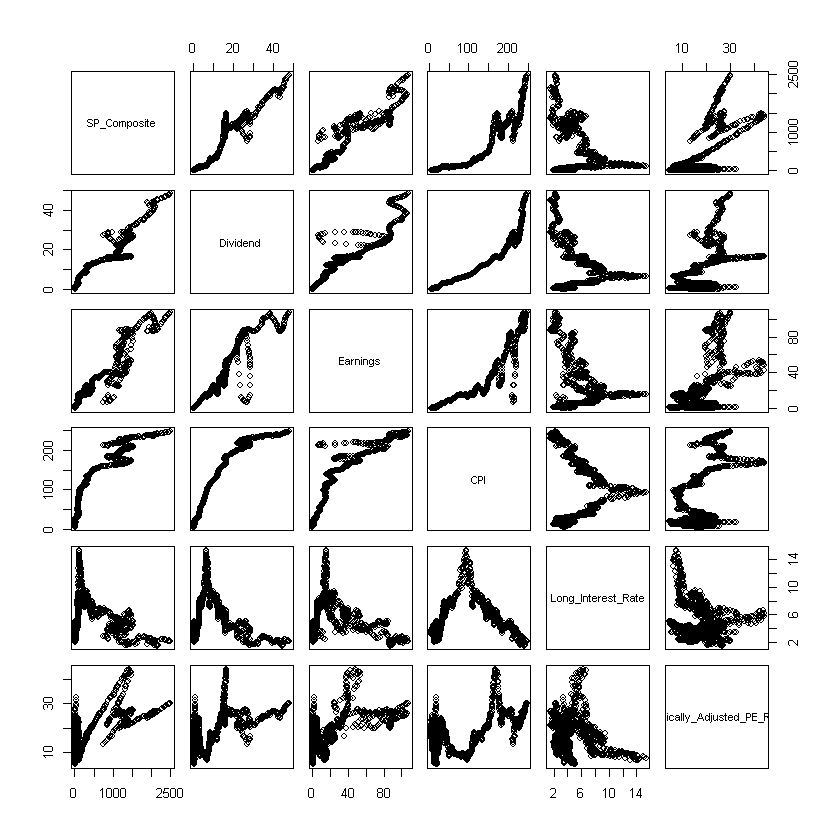

In [35]:
#kind of hard to view all plots. take out the "Real" data:
pairs(~SP_Composite+Dividend+Earnings+CPI+Long_Interest_Rate+Cyclically_Adjusted_PE_Ratio,data=Qdata_nodate, na.action = na.omit)

### Observation:
1. It appears that S&P Composite, Dividends, and Earnings all increase as CPI increases.
2. The major long interest rate spike occurs at about the same "x" axis value for dividends and earnings.
3. The distribution of Dividend vs Long INterest Rate and Earnings vs Long INterest Rate are similar.
4. Items 1-3 imply that there is a strong correlation between earnings and dividends.

In [ ]:
#lets run some analysis on our above observations:

